In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv(r"03_18_21_Synthesis_Plus_Spectra")

# def function identifier
wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]

full_spectra = full_data[wavelength_columns]

In [34]:
samples = full_data[0:96]
samples['ethanol wtf'] = samples['ethanol wtf'].round(3)
samples_spectra = samples[wavelength_columns]

blanks = full_data[(full_data['pfh wtf']==0) & (full_data['dppc wtf']==0) & (full_data['dspepeg200 wtf']==0)]
blanks['ethanol wtf'] = blanks['ethanol wtf'].round(3)
blanks_spectra = blanks[wavelength_columns]

unique_ethanol_samples = samples['ethanol wtf'].unique()
unique_ethanol_blanks = blanks['ethanol wtf'].unique()

c:\users\edwin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\edwin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# # If just want to look at single blanked samples 
# def plot_blanked(sample_indexes):
#     for sample_index in sample_indexes: 
#         sample_single = samples.loc[sample_index]['ethanol wtf']
#         sample_spec = samples_spectra.loc[sample_index].tolist()

#         blank_single = blanks[blanks['ethanol wtf'].round(3) == samples.loc[sample_index]['ethanol wtf'].round(3)] 
#         blank_spec = blanks_spectra.loc[blank_single.index]

#         blanked_spec = sample_spec - blank_spec
#         plt.plot(wavelengths, blanked_spec[wavelength_columns].iloc[0])

In [36]:
# plot_blanked(samples.index)

In [38]:
blanked_samples = []
for sample_conc, blank_conc in zip(unique_ethanol_samples, unique_ethanol_blanks): #essentially to check enough blank concs exist to cover the samples
    if sample_conc == blank_conc: # checking to match the thing that is identifying what blank goes with what samples 
        unblanked_full = samples[samples['ethanol wtf']==blank_conc]
        unblanked_spectra = samples_spectra.loc[unblanked_full.index]
        
        blank_full = blanks[blanks['ethanol wtf']==blank_conc]
        blank_spectra = blanks_spectra.loc[blank_full.index]
        
        blanked_spectra = unblanked_spectra - blank_spectra.values
        blanked_samples.append(blanked_spectra)
    else: 
        pass

blanked_samples_spectra = pd.concat(blanked_samples)
blanked_samples_spectra

,200.0nm,210.0nm,220.0nm,230.0nm,240.0nm,250.0nm,260.0nm,270.0nm,280.0nm,290.0nm,...,900.0nm,910.0nm,920.0nm,930.0nm,940.0nm,950.0nm,960.0nm,970.0nm,980.0nm,990.0nm
0,-0.009,-0.010,-0.007,-0.017,-0.002,-0.022,-0.011,-0.015,-0.017,0.002,...,-0.004,-0.003,-0.002,0.000,0.004,0.008,0.015,0.014,0.012,0.008
1,-0.007,-0.011,-0.009,-0.017,-0.015,-0.024,-0.023,-0.014,-0.040,-0.004,...,-0.003,-0.002,0.000,0.003,0.006,0.012,0.020,0.020,0.017,0.012
2,-0.005,0.000,0.006,0.006,0.021,0.001,-0.001,0.007,-0.037,-0.001,...,0.001,0.001,0.001,0.001,0.001,0.000,-0.001,-0.002,-0.001,-0.001
17,0.008,0.012,0.018,0.009,-0.020,-0.021,-0.015,-0.001,0.233,0.291,...,0.001,0.001,0.002,0.001,0.002,0.002,0.002,0.001,0.002,0.002
3,0.002,0.000,0.010,0.008,0.018,0.011,-0.001,0.003,-0.058,0.005,...,0.000,0.000,0.000,0.000,-0.001,-0.001,-0.002,-0.003,-0.002,-0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-0.001,0.001,-0.003,0.008,-0.001,0.005,-0.003,0.005,-0.085,-0.059,...,-0.001,-0.001,-0.002,-0.002,-0.002,-0.004,-0.005,-0.005,-0.004,-0.004
84,-0.032,-0.031,-0.041,-0.098,-0.065,-0.087,-0.102,-0.059,-0.171,-0.118,...,0.009,0.009,0.008,0.009,0.009,0.008,0.008,0.007,0.008,0.008
89,-0.028,-0.021,-0.036,-0.077,-0.074,-0.077,-0.082,-0.045,-0.045,-0.022,...,-0.002,-0.002,-0.002,-0.003,-0.003,-0.004,-0.006,-0.006,-0.006,-0.006
93,-0.027,-0.026,-0.039,-0.075,-0.057,-0.069,-0.074,-0.044,-0.128,-0.093,...,-0.002,-0.002,-0.002,-0.002,-0.002,-0.004,-0.005,-0.006,-0.005,-0.005


In [56]:
blanked_samples = samples.copy() # making a new full one to add the new blanked spectra in
blanked_samples[wavelength_columns] = blanked_samples_spectra
blanked_samples.to_csv(r"C:\Users\Edwin\Downloads\03_18_21 Synthesis Info Plus Blanked Spectras")

(-0.1, 0.1)

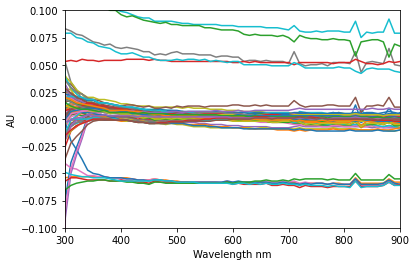

In [54]:
blanked_samples_spectra = blanked_samples[wavelength_columns]
for i, row in blanked_samples_spectra.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
    
plt.xlim(300,900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')
plt.ylim(-0.1, 0.1)

Text(0, 0.5, 'AU')

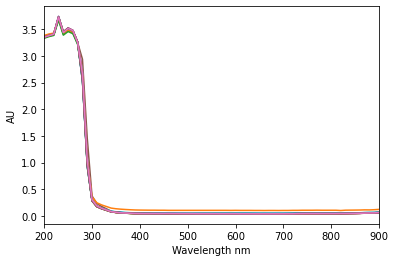

In [52]:
for i, row in blanks_spectra.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
plt.xlim(200,900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')

Text(0, 0.5, 'AU')

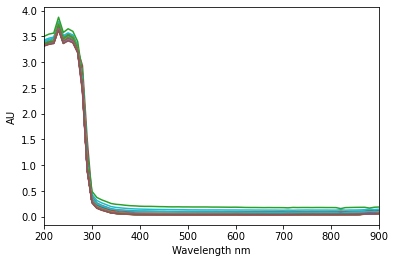

In [48]:
for i, row in full_data[0:len(blanked_samples_spectra)][wavelength_columns].iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
plt.xlim(200, 900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')